<a href="https://colab.research.google.com/github/Favourj-bit/AI-ML-tasks/blob/main/House_prediction_task(zummit).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
#importing data
df = pd.read_csv('/content/drive/MyDrive/zummit internship/house_data - house_data.csv.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.drop(columns=["id", "date"], inplace=True)

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


DATA ANALYSIS AND VISUALIZATIONS

In [ ]:
df.shape

(21613, 19)

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [ ]:
df['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [ ]:
df['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [ ]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [ ]:
df['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

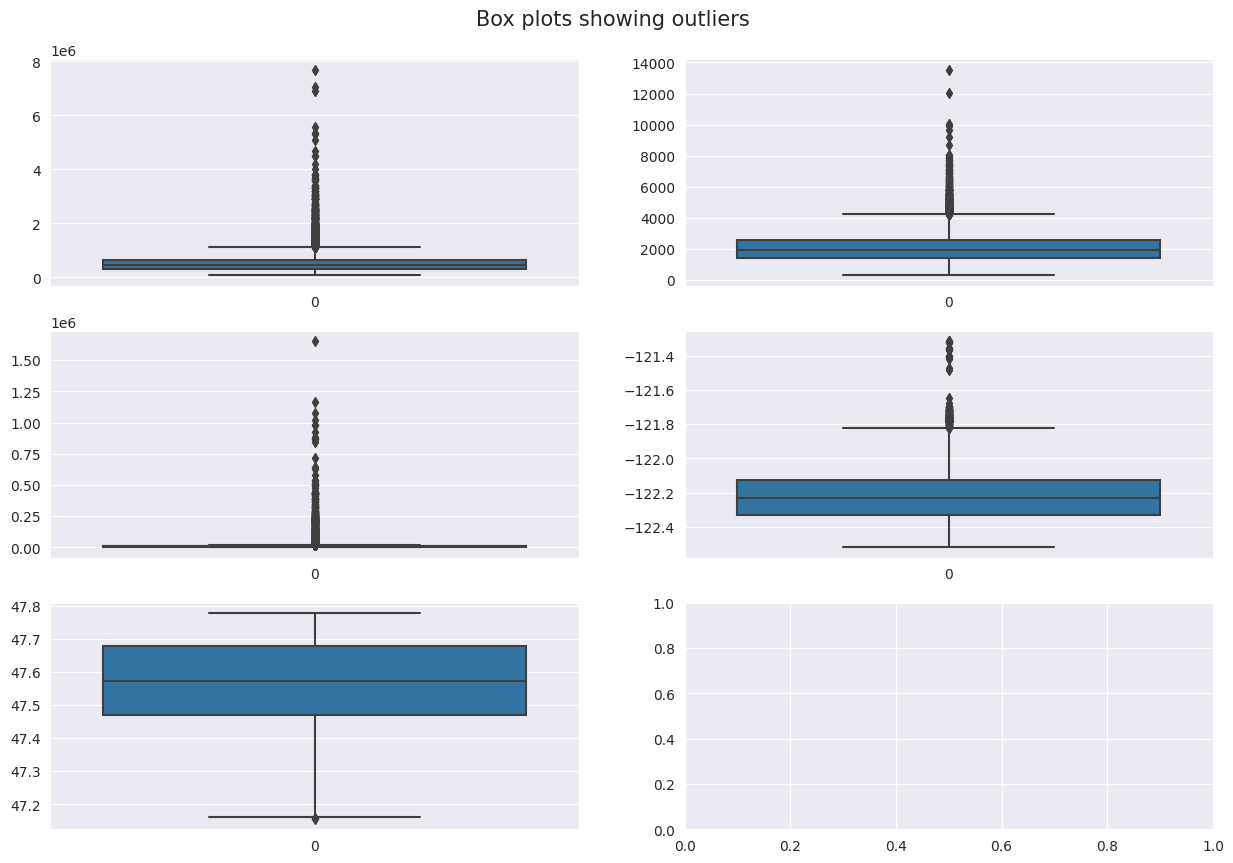

In [ ]:
#checking for outliers
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), df, ['price',	'sqft_living',	'sqft_lot', 'long', 'lat']):
  sns.boxplot(df[name], ax = ax)

In [55]:
help(warnings.filterwarnings)

Help on function filterwarnings in module warnings:

filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)
    Insert an entry into the list of warnings filters (at the front).
    
    'action' -- one of "error", "ignore", "always", "default", "module",
                or "once"
    'message' -- a regex that the warning message must match
    'category' -- a class that the warning must be a subclass of
    'module' -- a regex that the module name must match
    'lineno' -- an integer line number, 0 matches all warnings
    'append' -- if true, append to the list of filters



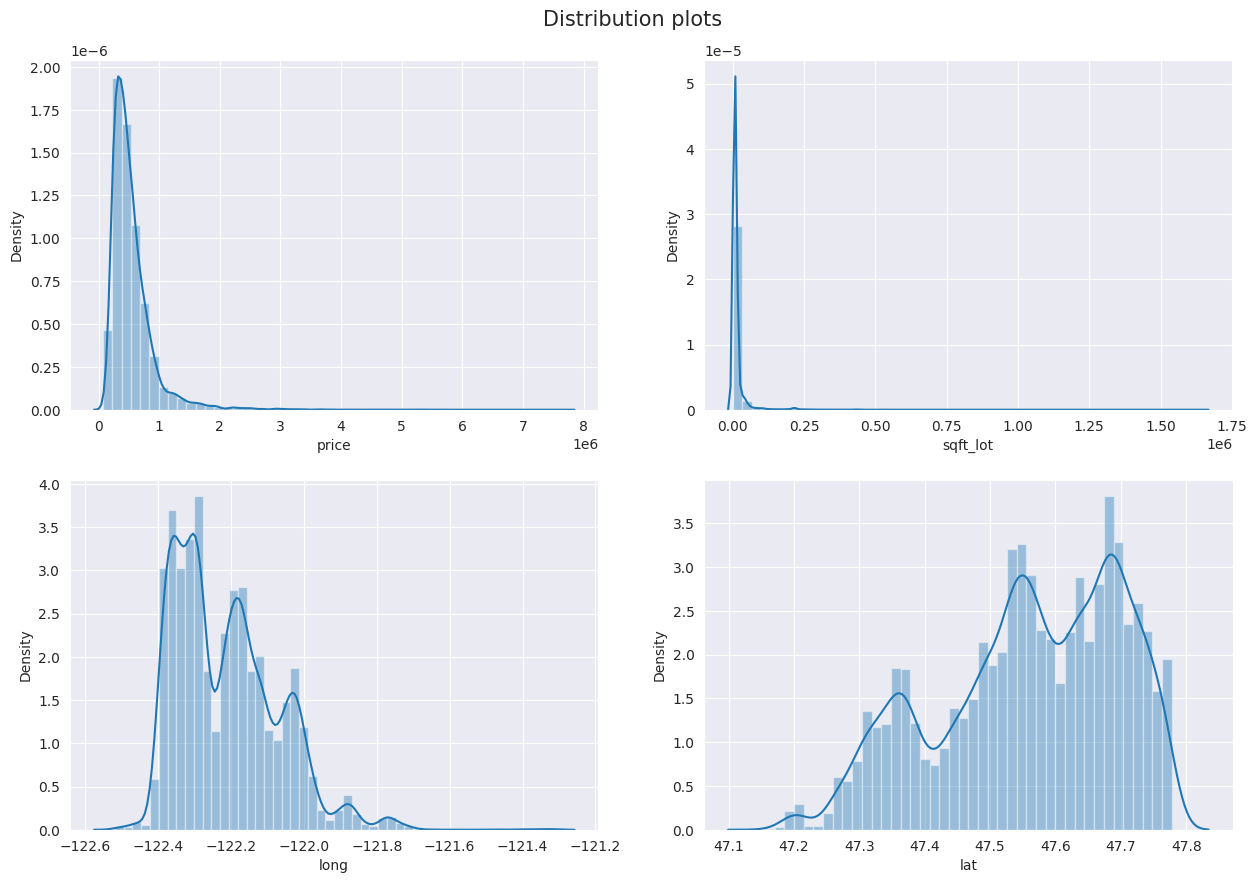

In [57]:
#checking distribution of the top 4 features
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Distribution plots', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), df, ['price',	'sqft_lot', 'long', 'lat']):
  sns.distplot(df[name], ax = ax)

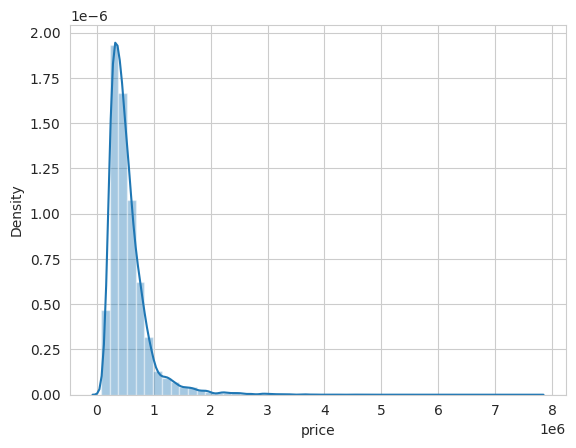

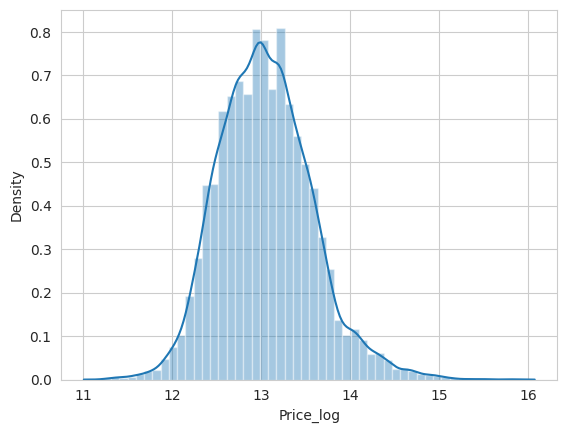

In [58]:
warnings.filterwarnings('ignore')
x = df.price
sns.set_style('whitegrid')
sns.distplot(x)
plt.show()

df['Price_log'] = np.log(df.price)
x = df.Price_log
sns.distplot(x)
plt.show()

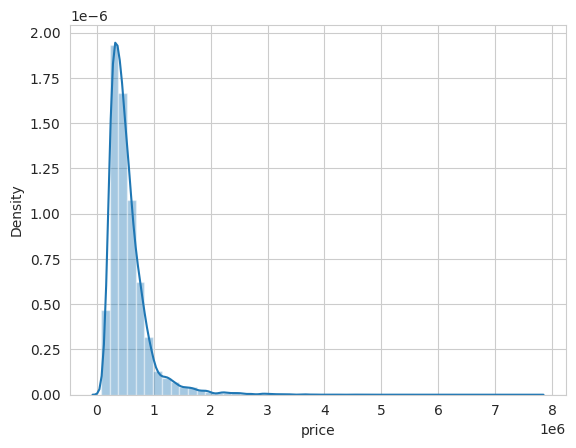

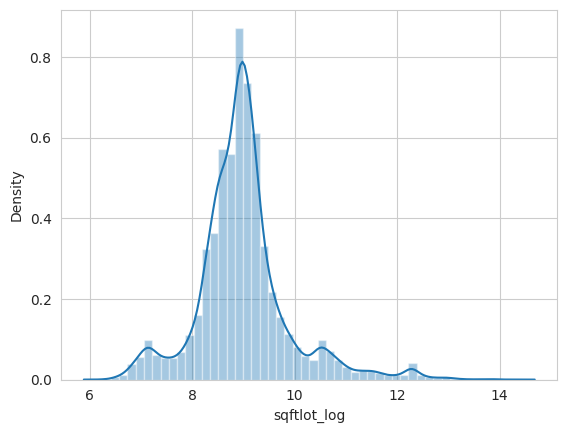

In [59]:
warnings.filterwarnings('ignore')
x = df.price
sns.set_style('whitegrid')
sns.distplot(x)
plt.show()

df['sqftlot_log'] = np.log(df.sqft_lot)
x = df.sqftlot_log
sns.distplot(x)
plt.show()

MODEL BUILDING AND VALIDATION

In [ ]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
features = df.columns.drop(['price', 'Price_log', 'zipcode', 'sqft_lot'])

#features
X = df[features]
#label
y = df['Price_log']

In [ ]:
X.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,sqftlot_log
0,3,1.00,1180,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,8.639411
1,3,2.25,2570,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,8.887653
2,2,1.00,770,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,9.210340
3,4,3.00,1960,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,8.517193
4,3,2.00,1680,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,8.997147


In [ ]:
X.shape, y.shape

((21613, 17), (21613,))

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, y_train.shape

((17290, 17), (17290,))

BUILDING LINEAR REGRESSION MODEL

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mean_squared_error(y_test, y_pred, squared=False)

0.254827796021713

Building Random Forest Regression Model

In [ ]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [ ]:
y_pred_for = forest_reg.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred_for, squared=False)

0.18108846028956205

BUILDING RANDOM FOREST MODEL

In [46]:
n_splits = 10
kfold = KFold(n_splits, shuffle= False)

In [47]:
for i, (tr_ind, test_ind) in enumerate(kfold.split(X,y)):
  X_tr, y_tr = X.iloc[tr_ind], y.iloc[tr_ind]
  X_vl, y_vl = X.iloc[test_ind], y.iloc[test_ind]

  forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
  forest_reg.fit(X_tr,y_tr)

y_pred = forest_reg.predict(X_vl)
print(f'RMSE: {mean_squared_error(y_vl, y_pred, squared=False)}')

RMSE: 0.1529742407657337


In [ ]:
#help(mean_squared_error)

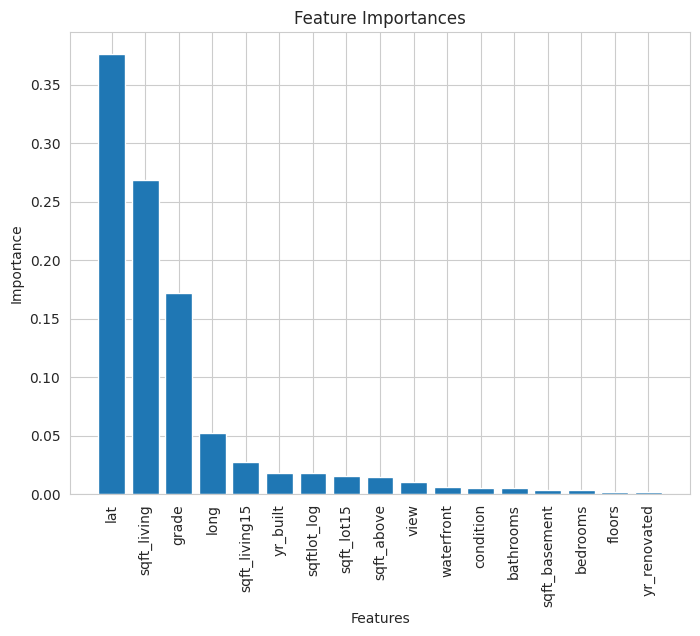

In [49]:
# Get the feature importances
importances = forest_reg.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.bar(range(len(importances)), sorted_importances, tick_label=X_train.columns[sorted_indices])

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Set axis labels and title
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")

# Display the plot
plt.show()

In [ ]:
#import pickle
#pickle_out = open("Predictor.pkl","wb")
#pickle.dump(lgb, pickle_out)
#pickle_out.close()